
# Bank's credit card churn prediction
In this project I'll create a ML model to predict the probability of a customer churn.
The pipeline used for it is based on **CRISP-DM** framework, as follow:

1. Describe and understand business objective
2. Data undersdanding: 
    - Collect the data and get an overview of it
    - Explore the data (EDA)
3. Data preparation
    - Feature engineering
    - data cleaning
    - data preprocessing
4. Modeling
    - Divide between train / test
    - Model training
    - Model testing
5. Model testing
6. Conclude and interpret results
7. Deploy

# 1. Business problem
We are worried of more customer leaving our credit card services. We'd like to undestand better the causes , predicit how likely a customer can churn and do sobre proactively actions to reduce the chance of a customer

**Which are project objectives?**

1. Identify reasons why a customer is churning
2. Construct a model to predict the chance of a customer churn
3. Offer action plans to reduce credit card churn# Bank's credit card churn prediction

**Which are the benefits**
1. Cost saving
2. Improved customer retention
3. Targeted marketing


#### **Importing libraries**

In [1]:
# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Setting working path
%cd c:/Desenvolvimento/Git/ChurnPredictionCreditCard

c:\Desenvolvimento\Git\ChurnPredictionCreditCard


In [2]:
import sys
import os

# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Utils
#from src.edautils import *


# Split the data.
from sklearn.model_selection import train_test_split

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

# 2. Understand the data

- dataset source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes
- It contains credit card customers data, with demographic, financial and product information. It is already labeled, with churners identified as 1 and non-churners identified as 0 in the attrition flag variable.

### Data dictionary
<b>1. CLIENTNUM:</b> Client number. Unique identifier for the customer holding the account. Categorical nominal.<br>
<b>2. Attrition_Flag:</b>  Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.<br>
<b>3. Customer_Age:</b>  Demographic variable - Customer's Age in Years. Numerical discrete.<br>
<b>4. Gender:</b>  Demographic variable - M=Male, F=Female. Categorical nominal.<br>
<b>5. Dependent_count:</b>  Demographic variable - Number of dependents. Numerical discrete.<br>
<b>6. Education_Level:</b>  Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.<br>
<b>7. Marital_Status:</b>  Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.<br>
<b>8. Income_Category:</b>  Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >.). Categorical ordinal.<br>
<b>9. Card_Category:</b>  Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.<br>
<b>10. Months_on_book:</b>  Period of relationship with bank. Numerical discrete.<br>
<b>11. Total_Relationship_Count:</b>  Total no. of products held by the customer. Numerical discrete.<br>
<b>12. Months_Inactive_12_mon:</b>  No. of months inactive in the last 12 months. Numerical discrete.<br>
<b>13. Contacts_Count_12_mon:</b>  No. of Contacts in the last 12 months. Numerical discrete.<br>
<b>14. Credit_Limit:</b>  Credit Limit on the Credit Card. Numerical continuous.<br>
<b>15. Total_Revolving_Bal:</b>  Total Revolving Balance on the Credit Card (how much balance is carried to pay on next month). Numerical discrete.<br>
<b>16. Avg_Open_To_Buy:</b>  Open to Buy Credit Line (Average of last 12 months). Numerical continuous.<br>
<b>17. Total_Amt_Chng_Q4_Q1:</b>  Change in Transaction Amount (Q4 over Q1). Numerical continuous.<br>
<b>18. Total_Trans_Amt:</b>  Total Transaction Amount (Last 12 months). Numerical discrete.<br>
<b>19. Total_Trans_Ct:</b>  Total Transaction Count (Last 12 months). Numerical discrete.<br>
<b>20. Total_Ct_Chng_Q4_Q1:</b>  Change in Transaction Count (Q4 over Q1). Numerical continuous.<br>
<b>21. Avg_Utilization_Ratio:</b>  Average Card Utilization Ratio. Numerical continuous.<br>

In [3]:
ds = pd.read_csv('data/BankChurners.csv')

#remove unecessary columns
ds.drop(
    columns=[
        'CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
        ]
    , inplace=True
)
ds.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
ds.info()
print('\n')
print(f'Dataset shape {ds.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


Some insights on first view:

1. Average customer age is 46 years
2. On average, the customers has 4 products

In [6]:
# checking for null values
ds.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
# checking for duplicated valures
print(f'There are {ds.duplicated().sum()} duplicated values')

There are 0 duplicated values


In [8]:
# checking for NA values
ds.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- making the column titles to lower case to make easier manipulation

In [9]:
ds.columns = [x.lower() for x in ds.columns]
ds.sample(10)

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
1872,Existing Customer,60,M,0,Uneducated,Married,Less than $40K,Blue,52,5,1,2,2595.0,2189,406.0,0.276,1562,27,0.174,0.844
7247,Existing Customer,37,F,4,Graduate,Single,Unknown,Blue,31,3,3,2,1438.3,0,1438.3,0.919,5001,91,0.625,0.000
7382,Existing Customer,56,F,2,Unknown,Married,Less than $40K,Blue,36,6,2,1,1971.0,922,1049.0,0.762,4827,84,0.867,0.468
1311,Attrited Customer,40,M,4,Graduate,Single,$80K - $120K,Silver,22,3,1,3,34516.0,0,34516.0,0.640,1028,26,0.300,0.000
9203,Existing Customer,43,F,3,Graduate,Unknown,Less than $40K,Blue,37,2,3,3,3461.0,1767,1694.0,0.829,13179,122,0.694,0.511
861,Existing Customer,65,F,0,High School,Married,Unknown,Blue,36,4,3,2,8138.0,2104,6034.0,0.837,1299,29,0.812,0.259
4143,Existing Customer,49,M,4,Graduate,Single,$80K - $120K,Blue,36,5,1,3,1963.0,1516,447.0,0.872,4150,75,0.744,0.772
6308,Existing Customer,58,F,4,High School,Single,Less than $40K,Blue,39,3,1,3,2755.0,1483,1272.0,0.806,4394,75,0.630,0.538
2922,Existing Customer,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
3182,Existing Customer,57,F,2,Unknown,Married,Less than $40K,Blue,49,5,3,1,2679.0,2011,668.0,0.466,1723,28,0.750,0.751


## EDA
Exploring the data to have a better understading of how features are distributed, what are the relationship/correlations between them, trends and get some insights

In [10]:
numerical_features = ds.select_dtypes('number').columns.tolist()
categorical_features = ds.select_dtypes('object').columns.tolist()
target = 'attrition_flag'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 14 numerical features. They are: 
['customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

There are 6 categorical features. They are: 
['attrition_flag', 'gender', 'education_level', 'marital_status', 'income_category', 'card_category']

The target feature is: attrition_flag.


In [11]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {ds[feature].nunique()} unique values. They are: ')
    print(ds[feature].value_counts(normalize=True))
    print()

attrition_flag
----------------------------------------
There are 2 unique values. They are: 
attrition_flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

gender
----------------------------------------
There are 2 unique values. They are: 
gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They a

Verifying churn rate

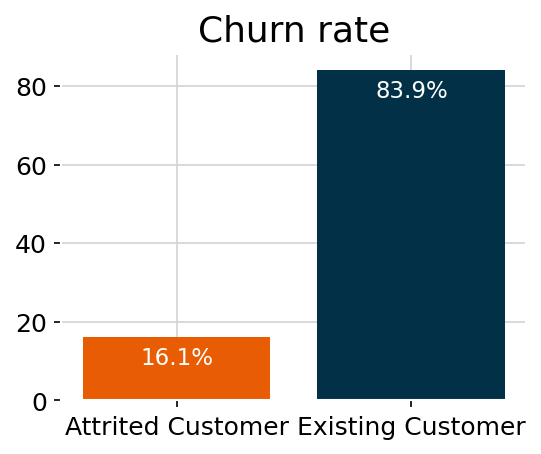

In [12]:
# Group the data by churn flag.
churn_grp = ds.groupby([target])[[target]].count().rename(columns={target: 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the barplot.
bars = ax.bar(x=churn_grp[target], height=churn_grp['pct'], color=['#e85d04', '#023047'])

ax.set_title('Churn rate')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')


- This chart shows churn rate is around 16.1%
- We can see mostly of clients are active customers. For ML model this is an unbalanced class, thus I'll have deal with it later


Checking now the numeric variable distribution

In [22]:
palette=sns.color_palette(['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33'])


def plot_analysis (data, features, typ='hist', colorPalette=palette, figsize=(15, 15)):
    '''
    Generate plots for data analysis
    -----------------------------------------------------------------------------------------------------------------------------------------
    Args:
        data: the dataframe
        features: the features to be plotted
        typ: hist: histogram, box: boxplot
        colorPalette: Seaboarn.color_pallette. Default value already set as ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
        figSize: the plotty size. Default is (20,20)
    -----------------------------------------------------------------------------------------------------------------------------------------
    Returns:
        None
    '''
    
    # calculating number of rows
    num_columns = 3
    num_features = len(features)
    num_rows = num_features // num_columns + (num_features % num_columns > 0)
    
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=figsize)

    for i, feature in enumerate(features):
        row = i // num_columns
        col = i % num_columns
        
        ax = axes[row, col] if num_rows > 1 else axes[col] 
        
        if typ=='hist':
            sns.histplot(data=data, x=feature, ax=ax, kde=True, stat='proportion')
        elif typ=='box':
            sns.boxplot(data=data, x=feature, ax=ax, palette=palette)
        
    plt.tight_layout()    
    
    return None




def check_outliers(data, features, k = 1.5):
    '''
    Print the outliers quantity for each feature, using Interquartile Range (IQR) method.
    -------------------------------------------------------------------------------------------------------------------------
    Args:
        data: the dataframe
        features: the features to be analysed
        k: how much of interquantile will be considered outlier. Default is 1.5x
    -------------------------------------------------------------------------------------------------------------------------
    Returns:
        None
    '''
    
    outliers = {}
    total_records = len(data)
            
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        
        outlier_count = len(feature_outliers)
    
        if(outlier_count>0):
            outliers[feature] = outlier_count
            
            
        
    df = pd.DataFrame.from_dict(
                        outliers, 
                        orient='index',
                        columns=['Cnt']).reset_index(names='Feature').sort_values(by=['Cnt'], ascending=False)
    df['%'] = df['Cnt'] / total_records
    df['%'] = df['%'].map('{:.2%}'.format)
    
    return df.reset_index().drop('index', axis=1)
        

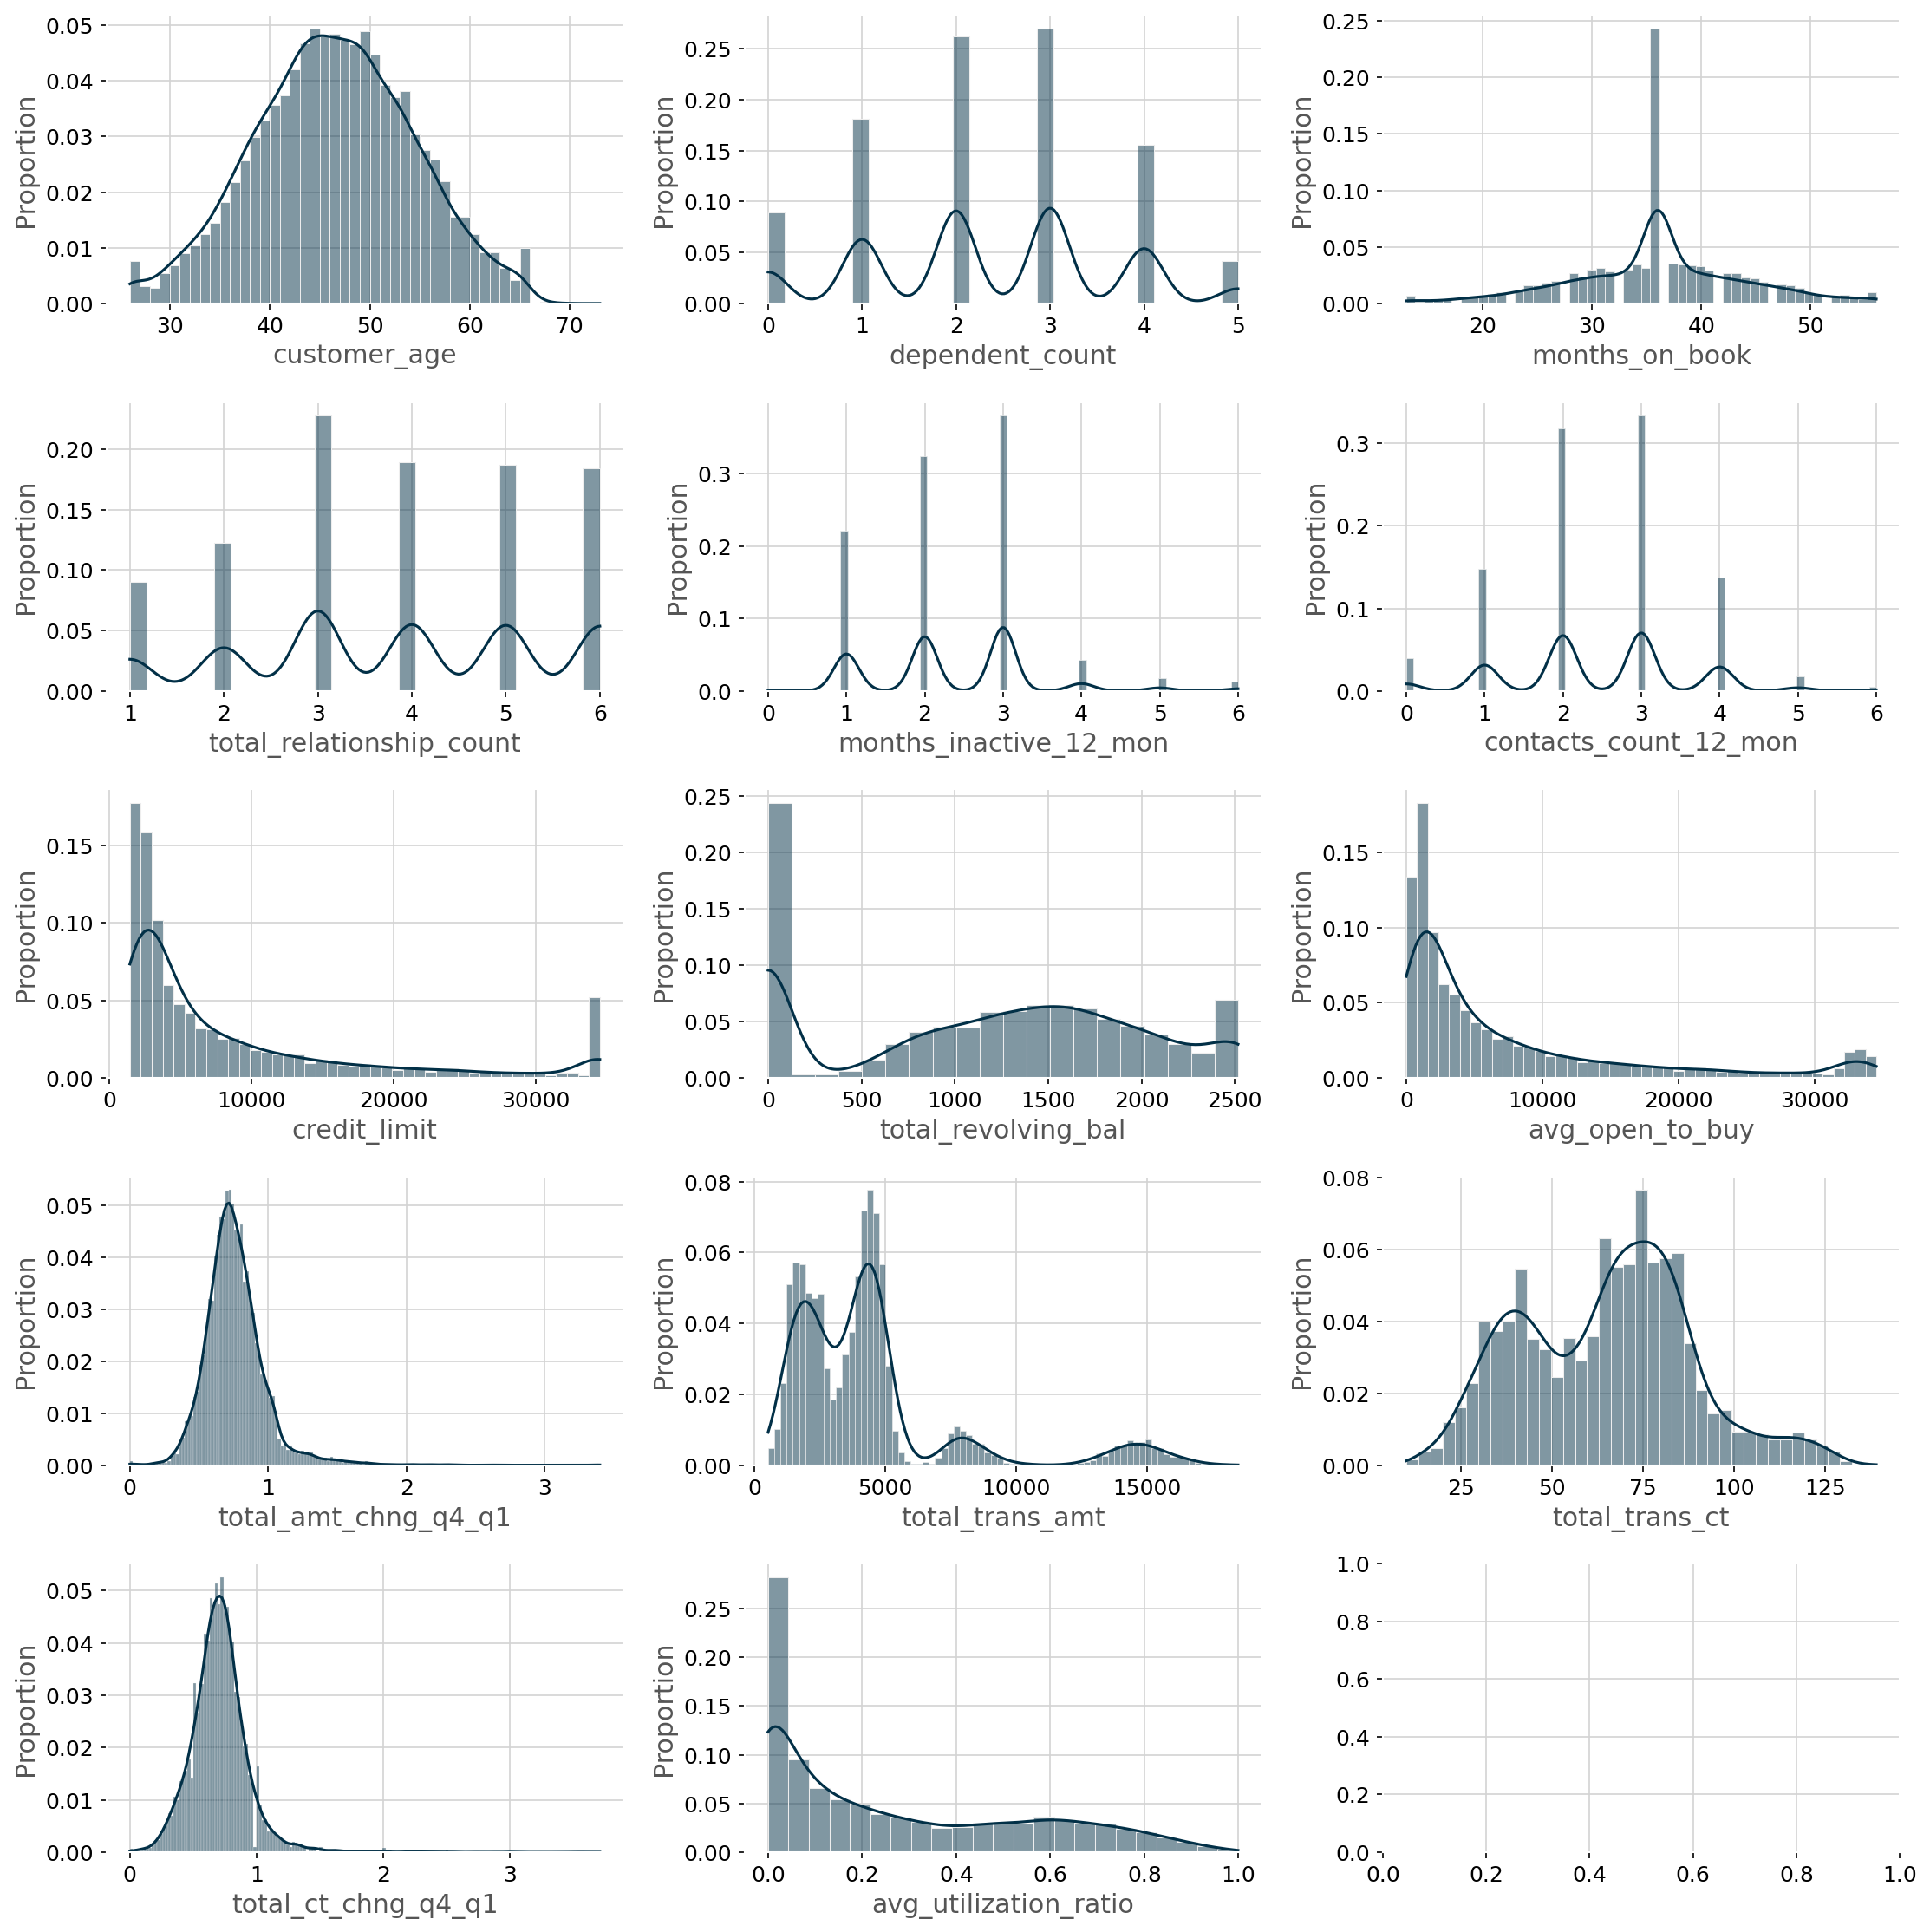

In [23]:
plot_analysis(data=ds, features=numerical_features, typ='hist')

Insights:
- mostly of customerss are 40~50 years old
- a large part of the customers are around 36 months with card services. Is there any relationship between the length of relationship and churn?
- 30% of the customers have 3 services contracted with the bank. Customers with less services are more propense to churn?
- the utilization rate of the cards are low. 25% of the customers are not using the card. These customers may have high churn possibility. Also when analysing the revolving balance, the same proportion of customers has 0 value.

Checking outliers

In [24]:
check_outliers(
    ds,
    numerical_features,
    1.5
).head(100)

,Feature,Cnt,%
0,credit_limit,984,9.72%
1,avg_open_to_buy,963,9.51%
2,total_trans_amt,896,8.85%
3,contacts_count_12_mon,629,6.21%
4,total_amt_chng_q4_q1,396,3.91%
5,total_ct_chng_q4_q1,394,3.89%
6,months_on_book,386,3.81%
7,months_inactive_12_mon,331,3.27%
8,customer_age,2,0.02%
9,total_trans_ct,2,0.02%


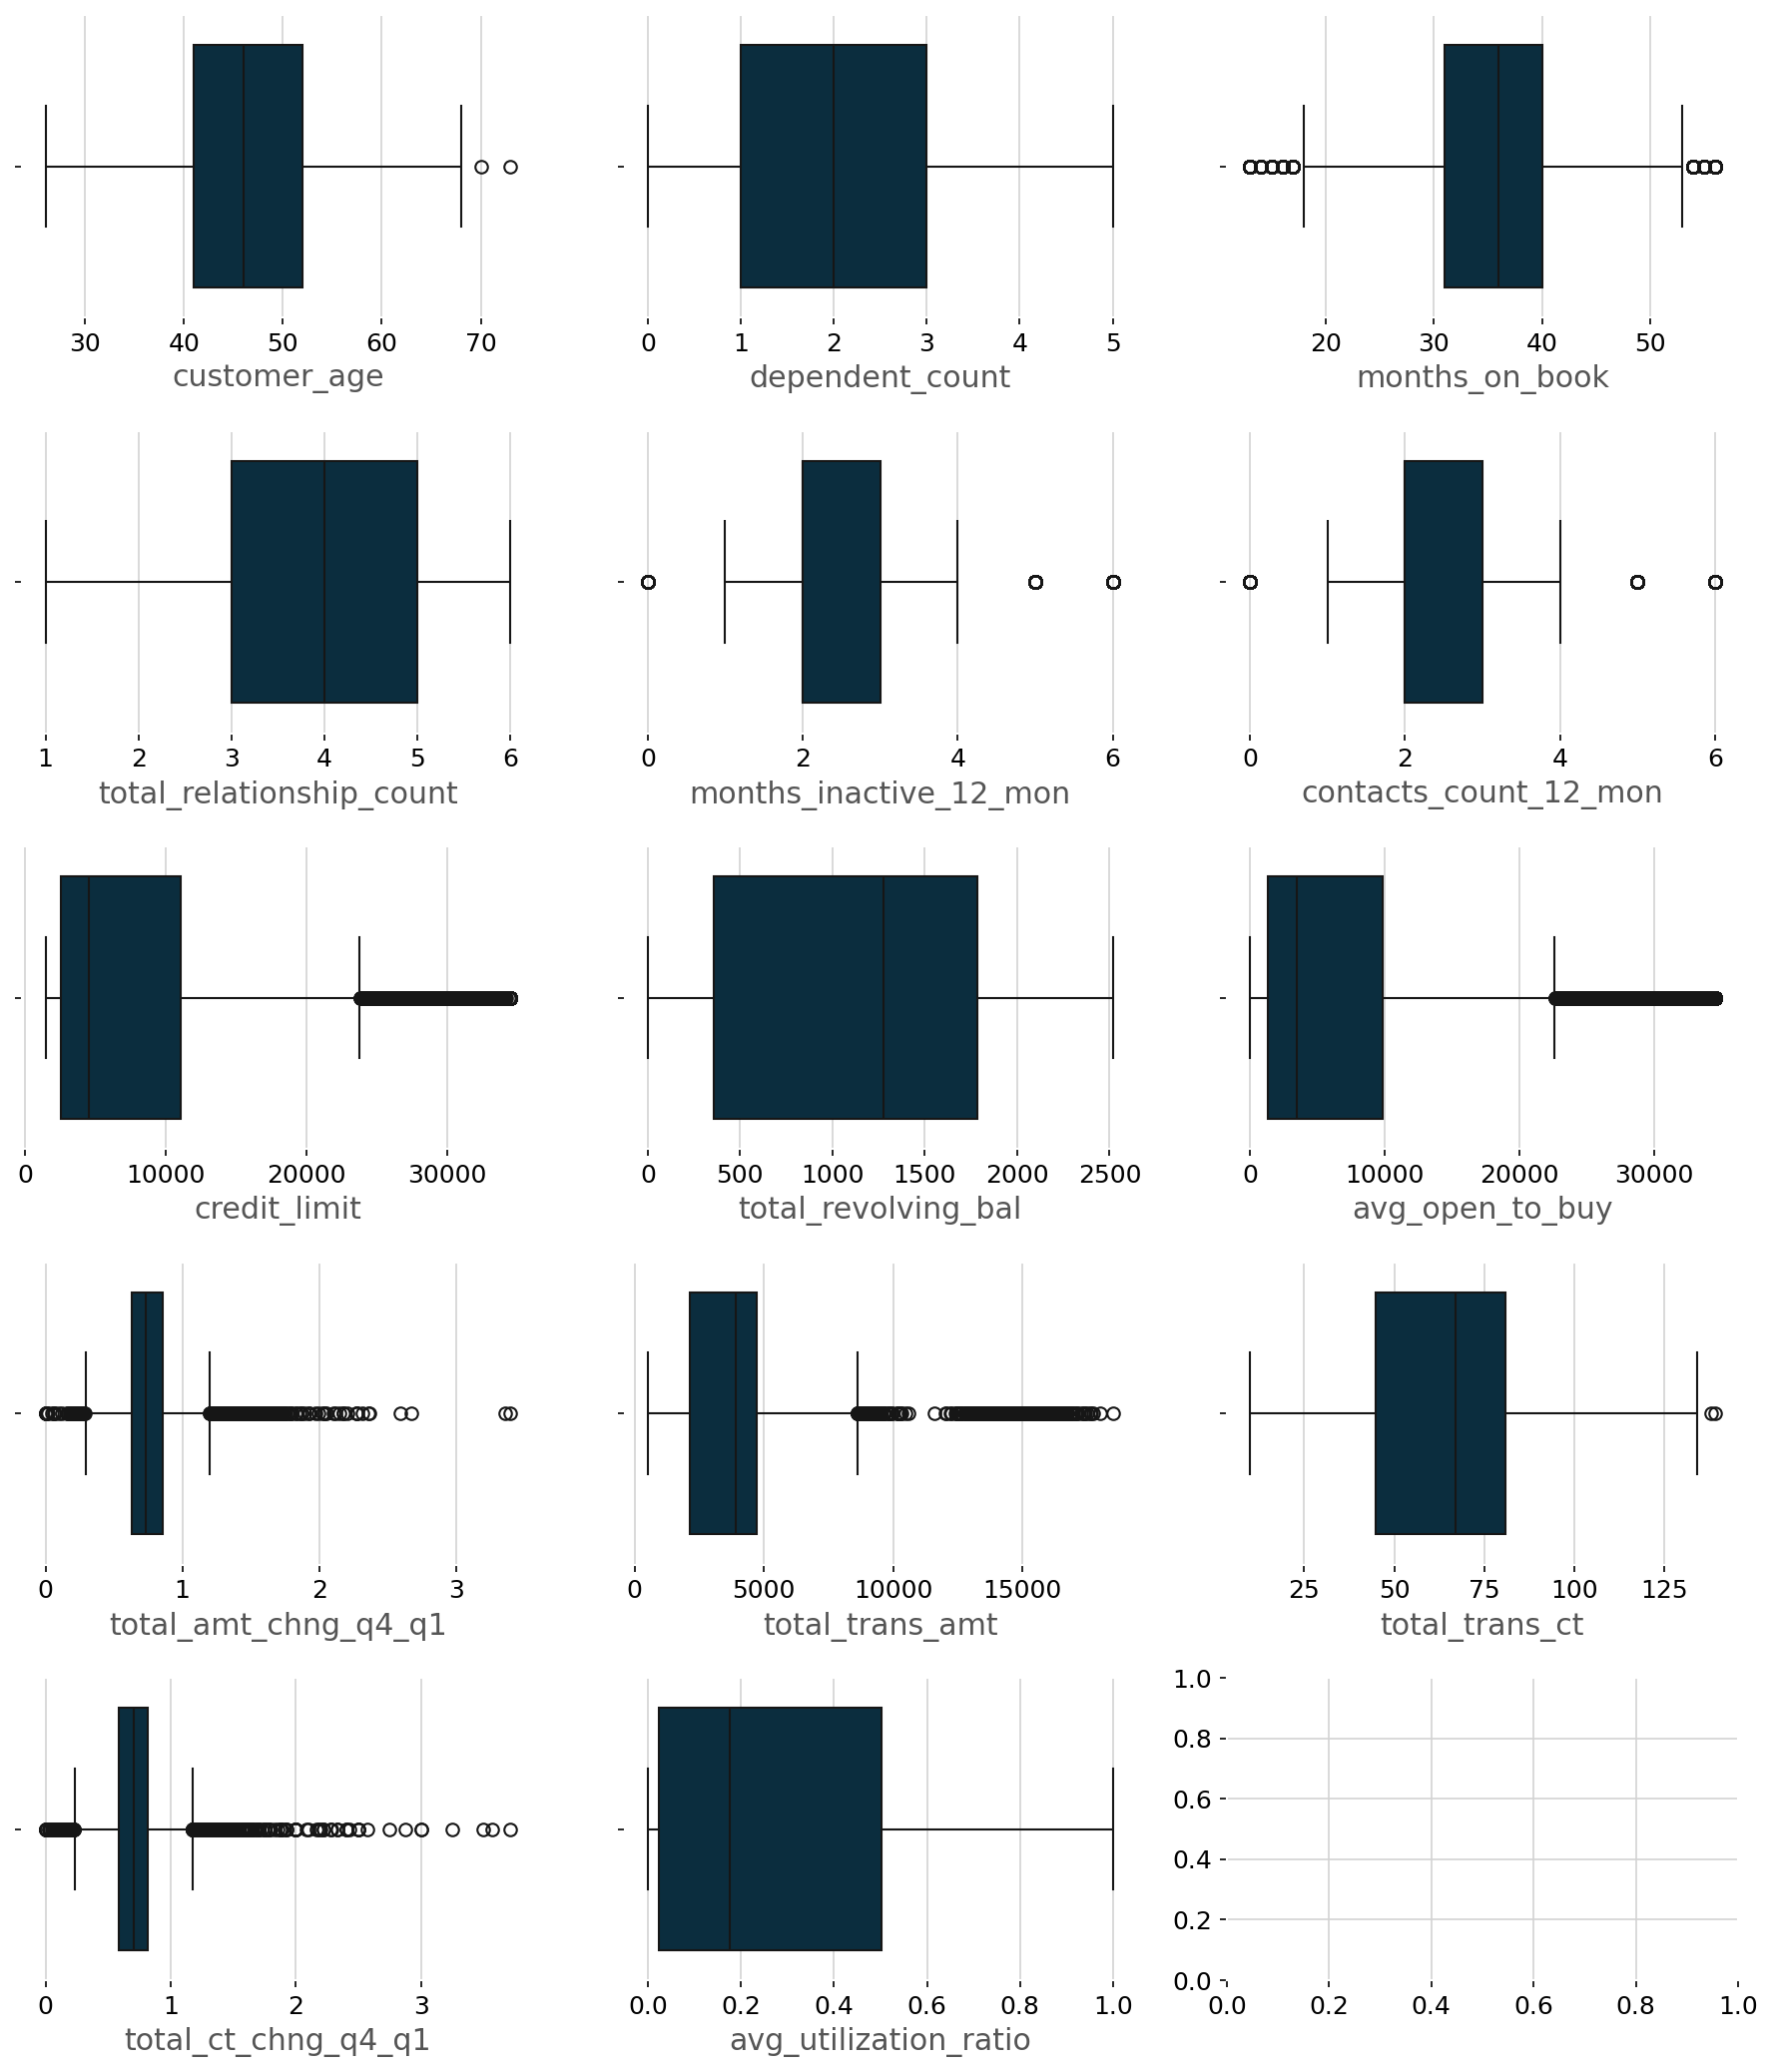

In [26]:
plot_analysis(data=ds, features=numerical_features, typ='box', figsize=(12,14))